**Exploratory Data Analysis and Sales Prediction For Walmart**

-- **Krishna Chaitanya N**

The aim of this project is to showcase my skills or abilities regarding **Exploratory Data Analysis (EDA)**, where one gets an all round view on a particular dataset and is able to visually claim certain patterns or give predications which are generally useful for a certain body, entity or company.

The dataset given and used in this project is titled by **'walmart.csv'** and contains the output sales of the company of **Walmart**, an American based multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores in the United States, headquartered in Bentonville, Arkenasas (src: Wikipedia)

I have obtained the dataset from Kaggle and the license to it is given here: https://cdla.io/permissive-1-0/.

The **Aim of the project** is to be able to do the following:

**->** Establish and find relations between existing attributes of the dataset and see how each individual attribute affects the sales.

**->** Get a store wise analysis and find trends in the patterns.

**->** Build ML based or ARIMA based prediction models to forecast the futuristic sales.

**->** Get a logical explpanation on the current sales pattern and brainstorm ideas to further increase the sales and improve upon the current standards.

Import the necessary libraries for the project.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#For building models regarding making futuristic predictions on the Sales of the company, the necessary libraries shall be imported later.

Import the dataset and save it as 'df' using pandas. Create a copy of the dataset and save it as 'data'. We shall implement all our EDA on 'data' which will be of the form of Panda DataFrame.

In [2]:
df = pd.read_csv('data/walmart.csv')
data = df.copy()
print("Given Dataset:")
df

Given Dataset:


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
print("Info:")
df.describe()

Info:


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


The given Dataset contains 7 attributes as follows:

**-> Store -** Contains the Store Number; There are 45 Stores available in this Dataset.

**-> Date -** The Data given is over a time span of 2 years and 8 months i.e. 143 weeks over the period of 2010-2012.

**-> Weekly_Sales -** Total Sales in a given week for a store

**-> Holiday_Flag -** Whether or not a Holiday occured in given week (not including Weekends)

**-> Temperature -** Average Local Temperature (in Fahrenheit F) for that week

**-> Fuel_Price -** Cost of fuel in the region in given week

**-> CPI -** Consumer Price Index in given week

**-> Unemployment -** Local Unemployment Rate in given week

As given in the above dataframe on df.describe(), we see that all the attributes contain data which is specific to it and there is a unity in terms of the variables each column uses.

Now check the data for missing or duplicated values.

In [4]:
print("Info:")
df.info()

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


We see that the Dates given are of string type and should be converted to datetime to carry out our analysis.

In [5]:
data.Date =pd.to_datetime(data.Date, format='%d-%m-%Y')

In [6]:
print("Check for Duplicated Values:")
df.duplicated().value_counts()

Check for Duplicated Values:


False    6435
dtype: int64

Text(0.5, 1.0, 'Missing Values - Null')

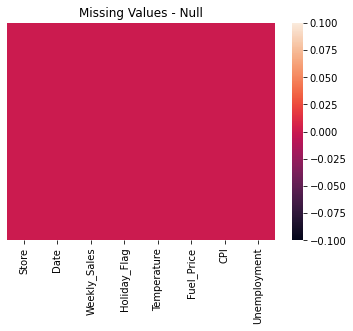

In [7]:
sns.heatmap(df.isnull(),yticklabels=False)
plt.title("Missing Values - Null")

Text(0.5, 1.0, 'Missing Values - Nan')

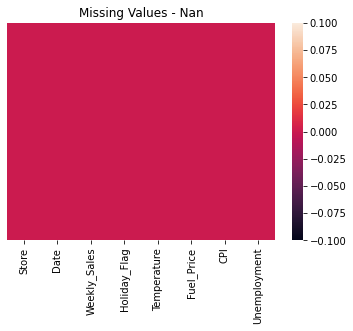

In [8]:
sns.heatmap(pd.isna(df),yticklabels=False)
plt.title("Missing Values - Nan")

We see that the Data is very clean and does not contain any impurity or has any missing values in it. We also saw that there are no repeated values for each store each week. This data is now ready for EDA.

In [9]:
#Express the given sales in millions for easy computation and anaysis:
data.Weekly_Sales = data.Weekly_Sales.apply(lambda x: x/1000000)

Text(0.5, 1.0, 'Average Sales Across All Stores Over Time')

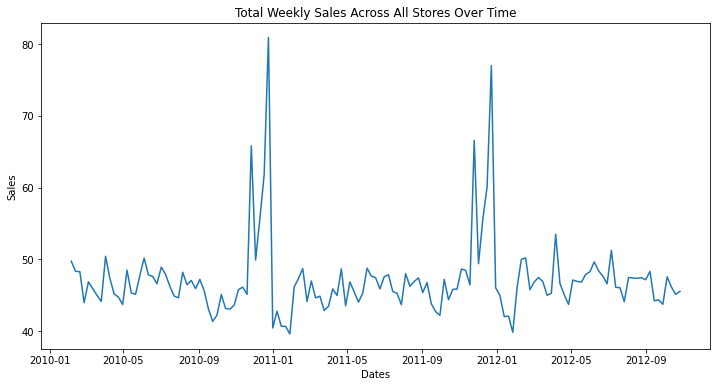

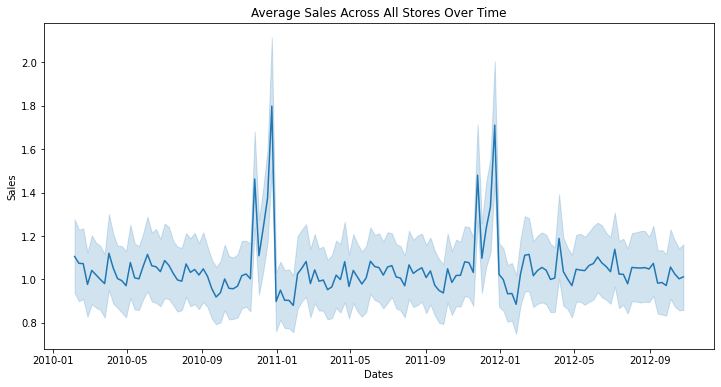

In [10]:
#Plot the total and average sales across all the stores of Walmart as a function of time:
sales = data.Weekly_Sales.groupby(data.Date).sum()

plt.figure(figsize=(12,6))
sns.lineplot(x=sales.index,y=sales)
plt.xlabel('Dates')
plt.ylabel('Sales')
plt.title('Total Weekly Sales Across All Stores Over Time')

plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Weekly_Sales', data=data)
plt.xlabel('Dates')
plt.ylabel('Sales')
plt.title('Average Sales Across All Stores Over Time')

Keep in mind that all the Sales portrayed are **expressed in millions**.

The First plot shows the total sales, whereas the thick line in the second plot shows the average sales per week over all stores. The lighter shade in the second plot shows the rough deviation while calculating this average value.

We see that the basic pattern remains the same in both the cases and only a visible change in the values is noticed.

Based on this very graph, one can deduce that the sales are generally higher (significantly more than the average) over the month of December and January over the year. The possible reason for this could be because of an excessive amount of shopping that occurs over the holiday period especially on the weeks of Christmas and New Year. Another reason could be that Walmart provides good sales offers in the form of discounts or merch or prizes to attract more customers during these festive times.

Now lets go over the distribution of Public Holidays throughout the year and how the sales are affected during these specific weeks.

In [11]:
holiday = data.Holiday_Flag.groupby(data.Date).apply(lambda x: x.mode().iloc[0])
print("Holidays over the time period:")
holiday

Holidays over the time period:


Date
2010-02-05    0
2010-02-12    1
2010-02-19    0
2010-02-26    0
2010-03-05    0
             ..
2012-09-28    0
2012-10-05    0
2012-10-12    0
2012-10-19    0
2012-10-26    0
Name: Holiday_Flag, Length: 143, dtype: int64

In [12]:
#Number of holidays throughout the year
print(f"Total Number of Holiday Weeks: {sum(holiday)}")
print(f"Percent of Holiday Weeks: {round(sum(holiday)*100/len(holiday),3)} %")

Total Number of Holiday Weeks: 10
Percent of Holiday Weeks: 6.993 %


Text(0.5, 1.0, 'Holiday Distribution - Scatter Plot')

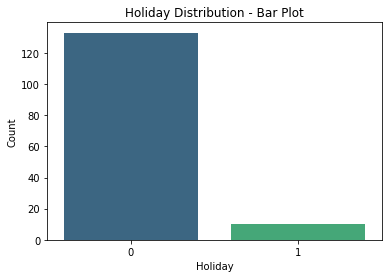

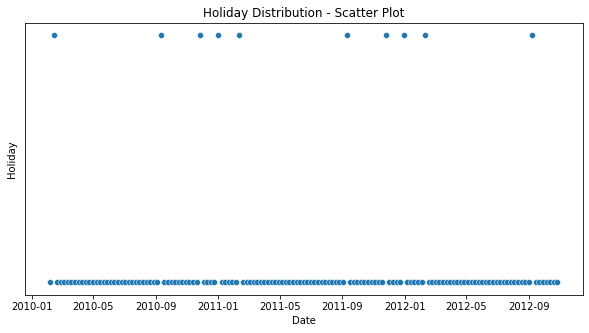

In [13]:
#Holiday Distribution over the Year
plt.figure()
sns.countplot(x=holiday,palette='viridis')
plt.xlabel('Holiday')
plt.ylabel('Count')
plt.title('Holiday Distribution - Bar Plot')

plt.figure(figsize=(10,5))
sns.scatterplot(x=holiday.index,y=holiday)
plt.xlabel('Date')
plt.ylabel('Holiday')
plt.yticks(ticks=[])
plt.title('Holiday Distribution - Scatter Plot')

This Holiday list includes only the public holidays of a year and doesn't include weekends. We see that though there are very few weeks with holidays throughout the year **(10)**, they are very sparsed throughout the year and not concentrated.

So, the ratio of the holiday to non-holiday weeks is pretty low **(~7%)**.

Text(0.5, 1.0, 'All Store Sales vs Time - Holiday Analysis ')

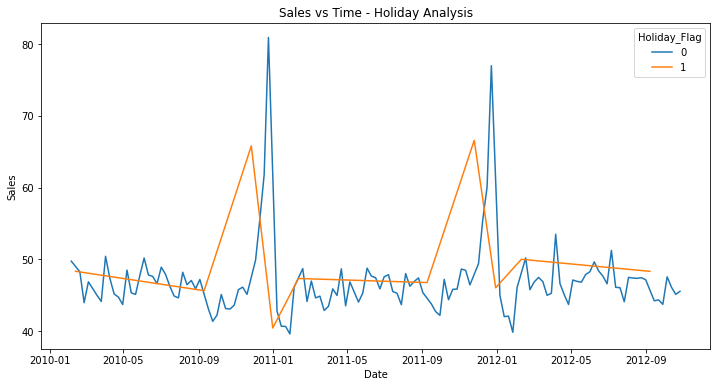

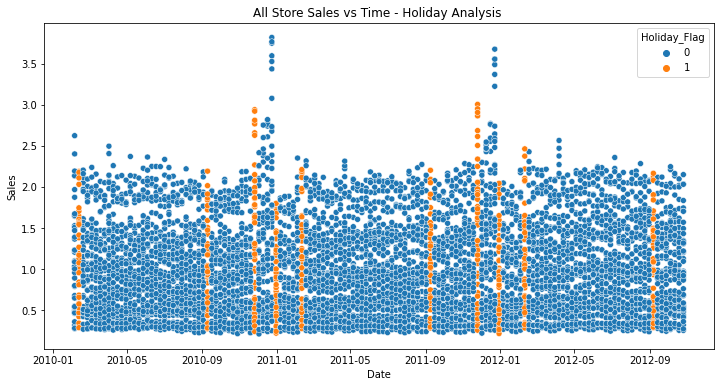

In [14]:
#Sales Analysis with Holiday Weeks
plt.figure(figsize=(12,6))
sns.lineplot(x=sales.index,y=sales,hue=holiday)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales vs Time - Holiday Analysis')

plt.figure(figsize=(12,6))
sns.scatterplot(x='Date',y='Weekly_Sales',data=data,hue='Holiday_Flag')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('All Store Sales vs Time - Holiday Analysis ')

We see that though the sales are slightly above average during these holiday weeks but I wouldn't consider them to be very significant changes. The possible reason for such a graph is because Walmart essentially deals with items and products which are of everyday use and are of commercial nature. So, a holiday week though till a small extent may bring more customers than usual in but will not result in a significant change in the Weekly Sales. 

Now Lets look at the Sales with a more Seasonal Analysis

In [15]:
#Mapping Dates to Seasons
seasons = {1:'Winter',2:'Winter',3:'Spring',4:'Spring',5:'Spring',6:'Summer',7:'Summer',8:'Summer',9:'Fall',10:'Fall',11:'Fall',12:'Winter'}
data['Season'] = data.Date.apply(lambda x: seasons[x.month])

These season mapping has been done keeping in mind the American Calendar and viewpoint as to how the months are classified according to the Seasons the Americans experience.

Text(0.5, 1.0, 'Seasonal Analysis of Sales')

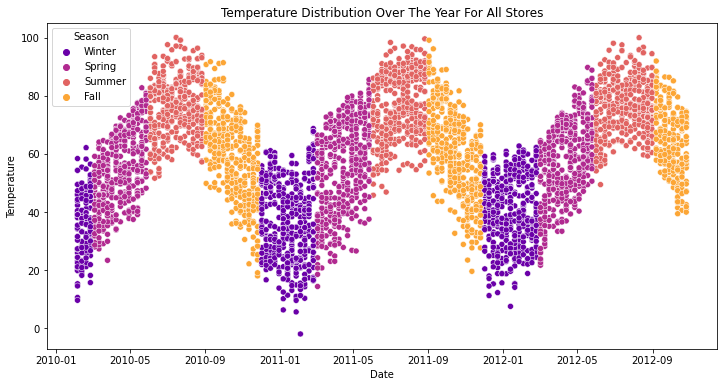

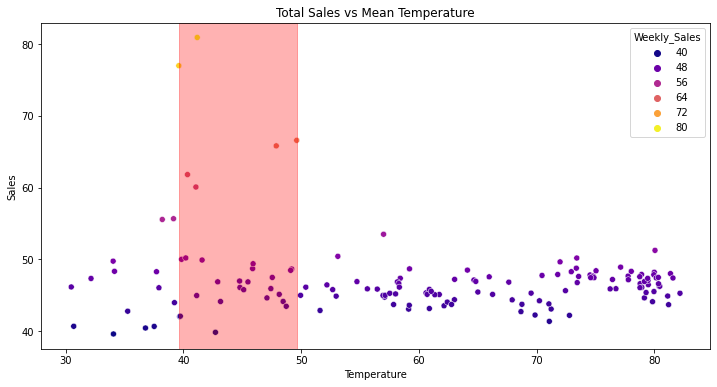

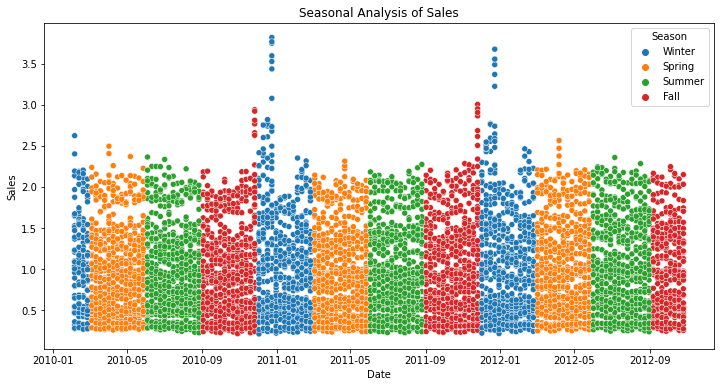

In [16]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Date',y='Temperature',data=data,hue='Season',palette='plasma')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Distribution Over The Year For All Stores')


#Avg temp across the stores each week:
temp = data.Temperature.groupby(data.Date).mean()
index = [i for i in range(len(sales)) if sales[i]>= 0.75*max(sales)]

plt.figure(figsize=(12,6))
sns.scatterplot(x=temp,y=sales,hue=sales, palette='plasma')
plt.axvspan(min(temp[index]),max(temp[index]),color='red',alpha=0.3)
plt.xlabel('Temperature')
plt.ylabel('Sales')
plt.title('Total Sales vs Mean Temperature')

plt.figure(figsize=(12,6))
sns.scatterplot(x='Date',y='Weekly_Sales',hue='Season',data=data)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Seasonal Analysis of Sales')

In [17]:
print(f"Range of temperatures for optimal Sales: {round(min(temp[index]),2)} F to {round(max(temp[index]),2)} F")

Range of temperatures for optimal Sales: 39.61 F to 49.63 F


Text(0.5, 1.0, 'Total Weekly Sales per Season')

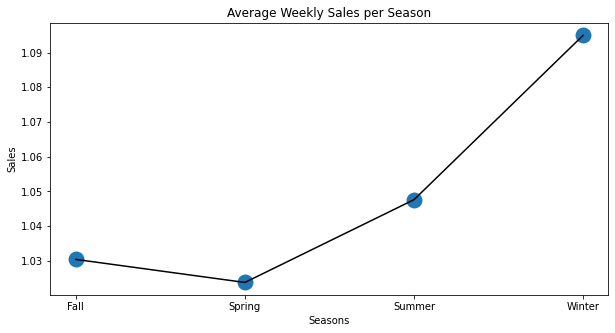

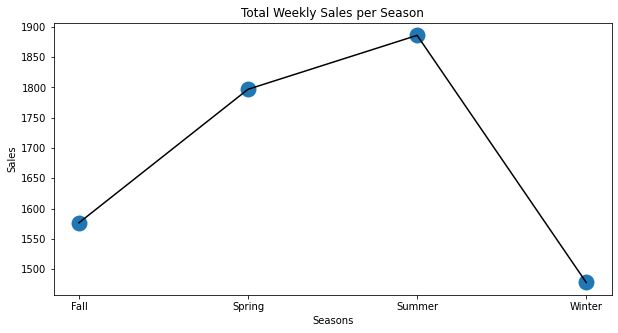

In [18]:
#Avg Sales per Season throughout all the stores
season_sales_avg = data.Weekly_Sales.groupby(data.Season).mean()
#Total Sales per Season throughout all the stores
season_sales_tot = data.Weekly_Sales.groupby(data.Season).sum()

plt.figure(figsize=(10,5))
sns.scatterplot(x=season_sales_avg.index,y=season_sales_avg,marker='o',s=300)
sns.lineplot(x=season_sales_avg.index,y=season_sales_avg,color='black')
plt.xlabel('Seasons')
plt.ylabel('Sales')
plt.title('Average Weekly Sales per Season')

plt.figure(figsize=(10,5))
sns.scatterplot(x=season_sales_tot.index,y=season_sales_tot,marker='o',s=300)
sns.lineplot(x=season_sales_tot.index,y=season_sales_tot,color='black')
plt.xlabel('Seasons')
plt.ylabel('Sales')
plt.title('Total Weekly Sales per Season')

In [19]:
print("Days per Season:")
data.Season.value_counts()/45
#The Divide by 45 comes from the fact that there are 45 stores which come under Walmart.

Days per Season:


Summer    40.0
Spring    39.0
Fall      34.0
Winter    30.0
Name: Season, dtype: float64

In [20]:
print(f"Correlation value between Temperature and Sales is {round(np.corrcoef(temp,sales)[0][1],3)}.")

Correlation value between Temperature and Sales is -0.159.


The Temperature Distribution graph is pretty straightforward as the patterns of the seasons alternate between a certain range, lowest being in winter and highest in the summer.

The Temperature Range for optimal Sales is around **40 F** to **50 F** where the sales being in the third quartile bring up sales more than the average amount. This range is typically in the Winter time around December - January and hence is expected to bring up more sales due to the festivities. Although, I take it granted that this range will bring higher sales, the change in the amount of sales brought up is not that significant as visible in the third graph where throughtout the year the total sales across all stores show nearly the same amount and are very precise as they are bunched very close to each other and only a few points are scattered above the average value, typically in the winter time. This is also proved by calculating the correlation value which turned out to be **-0.159** which is a pretty poor relation.

The last two graphs have really puzzled me or at the least more than the previous graphs. We see that the average sales for a particular season per day shows that this value is highest in the case of winter and least in spring and I had already come up with an intuition that this could be because of the festivities that fall under this season, them being Christmas and the New Year which might lead to more demand from the customers and higher than usual sales. However, the last graph above which shows the total sales plotted with season, we see that the highest sales come under Summer while the least total sales come from Winter which doesn't seem to make much sense at first glance.

On more careful thought and observation, I came to the conclusion that the total sales also does depend on the total number of working days or weeks and this number is fairly different over the different seasons, highest being around **40** in Summer and **30** in Winter. So, essentially even though the sales per day is high in Winter, it is the season with the least working days and so comes last in terms of total sales. On the other hand, even though the per day sale count in spring is the least amongst the months, in terms of total sales, the values come pretty close to that of summer's.

Text(0.5, 1.0, 'Total Sales vs Mean Fuel Prices')

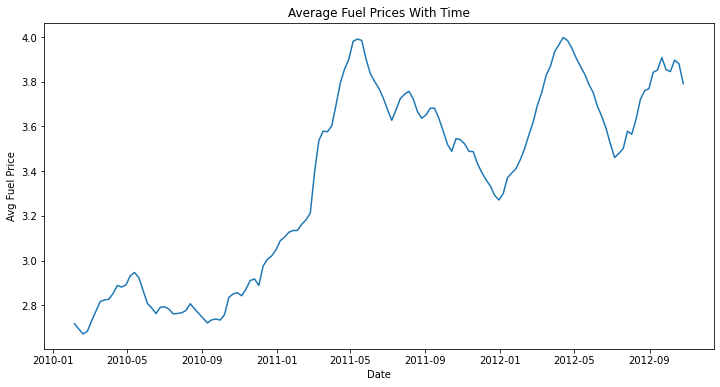

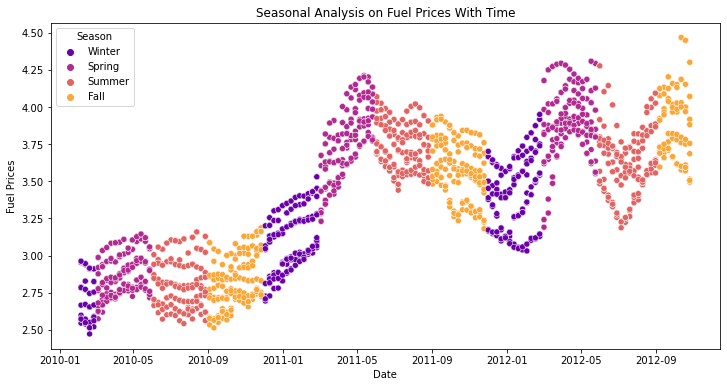

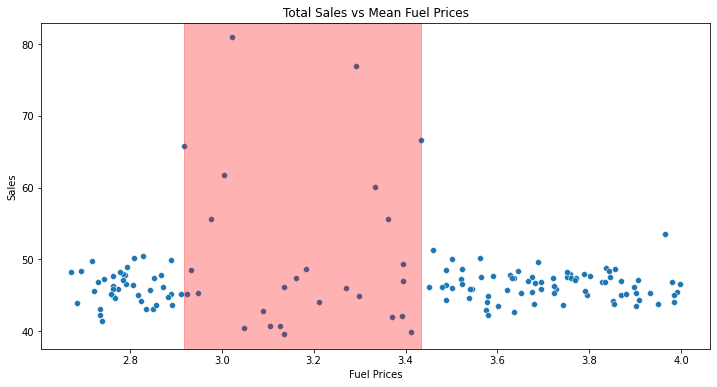

In [21]:
#Calculate the mean of all the fuel prices across the neighbourhoods of the stores per week.
fuel = data.Fuel_Price.groupby(data.Date).mean()
index = [i for i in range(len(sales)) if sales[i]>= 0.75*max(sales)]

plt.figure(figsize=(12,6))
sns.lineplot(x=fuel.index,y=fuel)
plt.xlabel('Date')
plt.ylabel('Avg Fuel Price')
plt.title('Average Fuel Prices With Time')

#Seasonal Analysis
plt.figure(figsize=(12,6))
sns.scatterplot(x='Date',y='Fuel_Price',data=data,palette='plasma',hue='Season')
plt.xlabel('Date')
plt.ylabel('Fuel Prices')
plt.title('Seasonal Analysis on Fuel Prices With Time')

plt.figure(figsize=(12,6))
sns.scatterplot(x=fuel,y=sales)
plt.axvspan(min(fuel[index]),max(fuel[index]),color='red',alpha=0.3)
plt.xlabel('Fuel Prices')
plt.ylabel('Sales')
plt.title('Total Sales vs Mean Fuel Prices')

In [22]:
print(f"Range of Fuel Prices for optimal Sales: {round(min(fuel[index]),2)} to {round(max(fuel[index]),2)}")

Range of Fuel Prices for optimal Sales: 2.92 to 3.43


In [23]:
print(f"Correlation value between Fuel Prices and Sales is {round(np.corrcoef(fuel,sales)[0][1],3)}.")

Correlation value between Fuel Prices and Sales is -0.057.


These fuel prices are expressed in **US Dollars per gallon of fuel**.

We see that the Mean Fuel Prices for all the stores per week are not constant but are fluctuating and are rather on the increasing side. This makes sense implying that fuel prices across the globe are increasing with time as it becomes more and more difficult in terms of production and supply of the fuel.

On a more Seasonal Analysis, we see that though there is a clear increase in the fuel prices each year, throughtout the year the fuel prices tend to go to the minimal side over the winters and reach their peak over spring. We cannot directly judge this pattern as though there seems to be one in this case, it might not be in the long run i.e. fuel prices might fluctuate irrespective of the season but definetely do seem to rise over the years.

The Third graph essentially is a scatterplot showing the fuel price variation with the sales. We see that the correlation value is definetely on the bad side with it being **-0.057** implying that there cannot be a clearly defined relation between the fuel prices and the sales brought up. Even though, we expressed it mathematically with the correlation, intuitively too it does make sense because irrespective of the fuel prices, people do need their everyday daily necessities provided by Walmart and though there might be some small relation, it wouldn't affect the sales too much. 

Anyhow, from the graph we see that a few (very few) abnormalities in the sales came up in the region when the fuel prices were between **2.92** to **3.43**. I am expressing this range for the sake of it, knowing pretty well that this might not be the case for other futuristic sales predictions and are true only within the scope of the present dataset.

Now, lets look at the data keeping in mind the Economic Indicators such as the CPI or the Unemployment Rates.

The **Consumer Product Index (CPI)** measures the average change in prices paid by consumers over a period of time for a basket of goods and services. (src: investopedia)

We shall now look at its variation over time followed by checking its relation with the sales brought up.

Text(0.5, 1.0, 'Total Sales Values Across Various Stores')

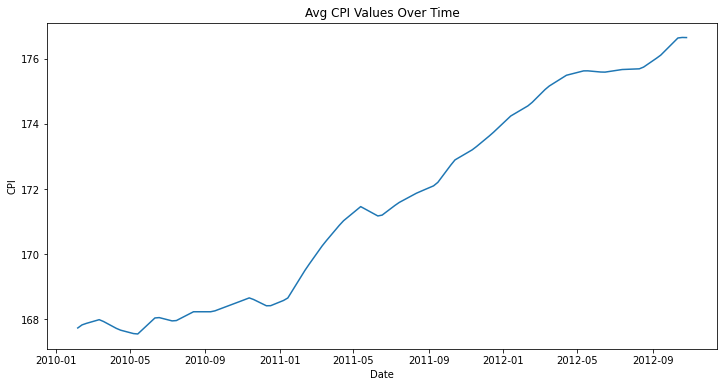

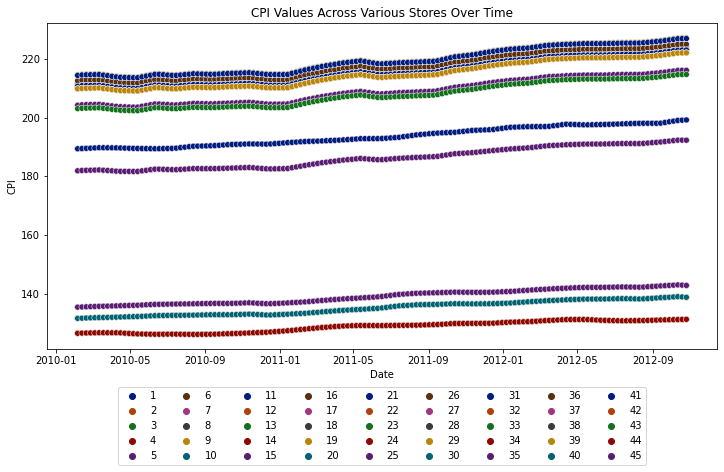

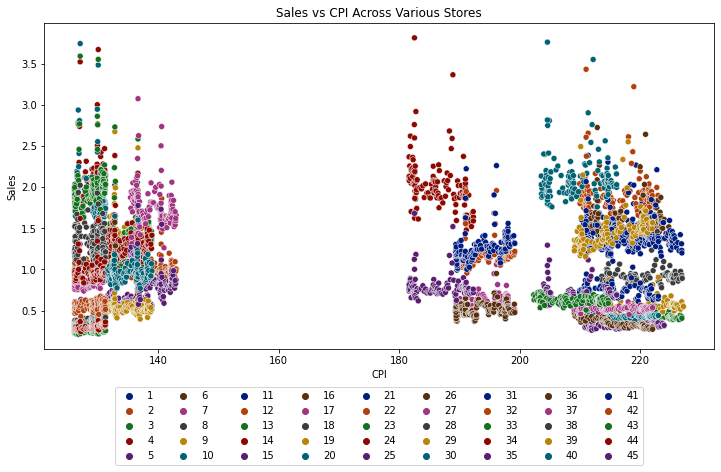

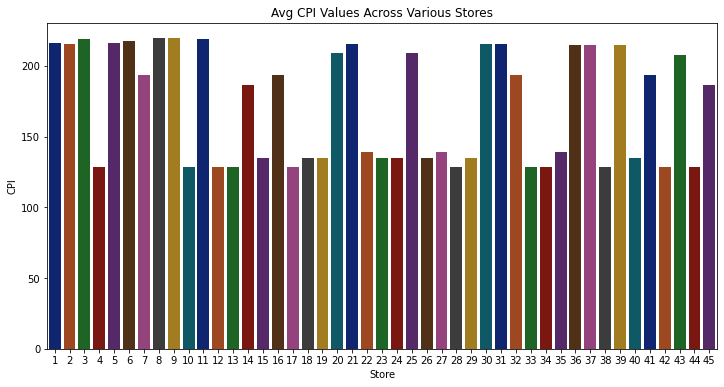

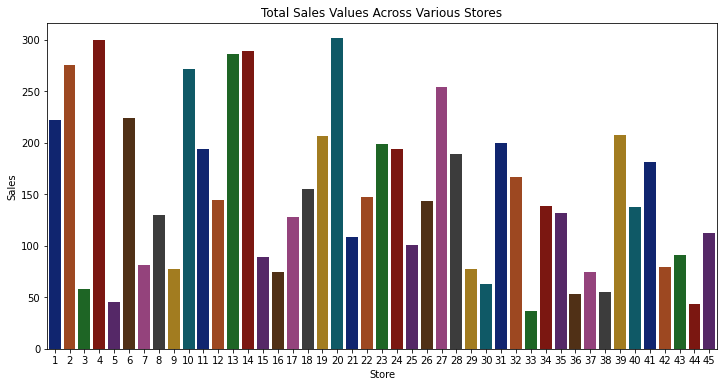

In [24]:
#avg cpi values across all stores over time
cpi = data.CPI.groupby(data.Date).mean()
plt.figure(figsize=(12,6))
sns.lineplot(x=cpi.index,y=cpi)
plt.xlabel('Date')
plt.ylabel('CPI')
plt.title('Avg CPI Values Over Time')

#Per Store Analysis
plt.figure(figsize=(12,6))
sns.scatterplot(x='Date',y='CPI',data=data,hue='Store',palette='dark')
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=9)
plt.xlabel('Date')
plt.ylabel('CPI')
plt.title('CPI Values Across Various Stores Over Time')

plt.figure(figsize=(12,6))
sns.scatterplot(x='CPI',y='Weekly_Sales',data=data,hue='Store',palette='dark')
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=9)
plt.xlabel('CPI')
plt.ylabel('Sales')
plt.title('Sales vs CPI Across Various Stores')

sales_s = data.Weekly_Sales.groupby(data.Store).sum()
cpi_s = data.CPI.groupby(data.Store).mean()

plt.figure(figsize=(12,6))
sns.barplot(x=cpi_s.index,y=cpi_s,palette='dark')
plt.xlabel('Store')
plt.ylabel('CPI')
plt.title('Avg CPI Values Across Various Stores')

plt.figure(figsize=(12,6))
sns.barplot(x=sales_s.index,y=sales_s,palette='dark')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.title('Total Sales Values Across Various Stores')

In [25]:
print("Stores with the Highest CPI values:")
cpi_s[cpi_s==cpi_s.max()]

Stores with the Highest CPI values:


Store
9    219.626689
Name: CPI, dtype: float64

In [26]:
print("Stores with the Least CPI values:")
cpi_s[cpi_s==cpi_s.min()]

Stores with the Least CPI values:


Store
4     128.679669
10    128.679669
12    128.679669
13    128.679669
17    128.679669
28    128.679669
33    128.679669
34    128.679669
38    128.679669
42    128.679669
44    128.679669
Name: CPI, dtype: float64

In [27]:
print("Stores with the Highest Sales:")
sales_s[sales_s==sales_s.max()]

Stores with the Highest Sales:


Store
20    301.397792
Name: Weekly_Sales, dtype: float64

In [28]:
print("Stores with the Least Sales:")
sales_s[sales_s==sales_s.min()]

Stores with the Least Sales:


Store
33    37.160222
Name: Weekly_Sales, dtype: float64

In [29]:
print(f"Correlation value between CPI and Sales is {round(np.corrcoef(cpi,sales)[0][1],3)}.")

Correlation value between CPI and Sales is 0.023.


From the First Graph, we see that the Avg CPI values across all the stores is definetely on the increasing side. This is justifiable as we see that the prices of the commercial products are bound to increase with time as the demand increases. The cost of a packet of milk is definetely higher than what it was a decade back. These prices are generally fixed by the government and are subject to vary over time with demand.

The Second Graph plots these CPI values across the different stores. We see that though there seems to be an expected increase in the cpi values of each store, these values are pretty different over the stores. The reason for this could be the geographical and economic conditions of the location in which the store is present. The stores with a reasonably low cpi values suggest that their location has not experienced much changes in the prices of the products and this gives us an insight that the demand in that location is relatively lower. We see that Store 9 has the maximum average CPI value and around 11 stores share the least average CPI values amongst all the stores under Walmart.

The Third Graph shows the relation between the CPI values and the Sales that were brought up. We see that we cannot establish a clear cut definition on the relation between them. This is also inferred by the Correlation value which was calculated to be around **0.023**. The general intuition is that the locations with the least cpi would generally bring up lower sales because the prices haven't inflated as well as around the other stores and we are right to a certain extent. We see that Store No. 33 brings up the least total sales and also it is included in the least cpi list too. However, such is not the case with the highest cpi Store which also tends to have less sales. Now, in this case it could be because of the number of customers actually buying the product in the store, higher prices do tend to disengage most audiences and thus result in lesser sales. Hence, we cannot really establish a definite relation between these two variables.

The Fourth and Fifth Graphs showcase the distribution of the Average CPI and Total Sales in terms of the different Stores under Walmart.

Now, lets shift our focus to the Unemployment Rate as an Economic Indicator.

**Unemployment Rate** generally describes the percentage of unemployed people out of the total people who are above the working age. This age differs from country to country but for the US, this number is around 16-18.

Text(0.5, 1.0, 'Total Sales Values Across Various Stores')

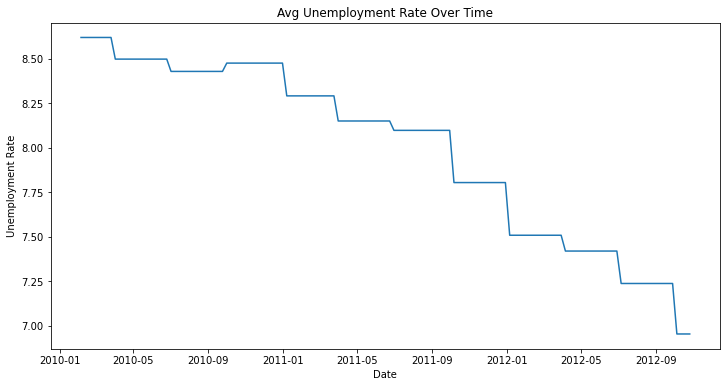

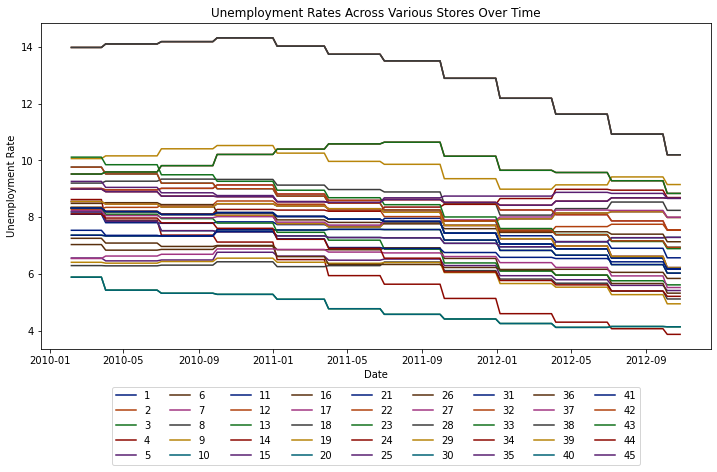

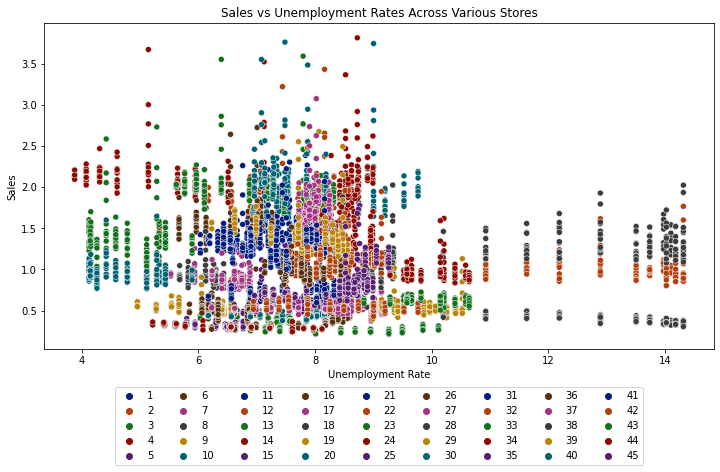

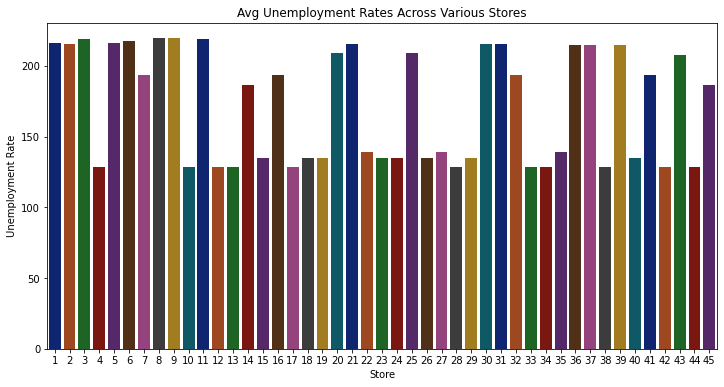

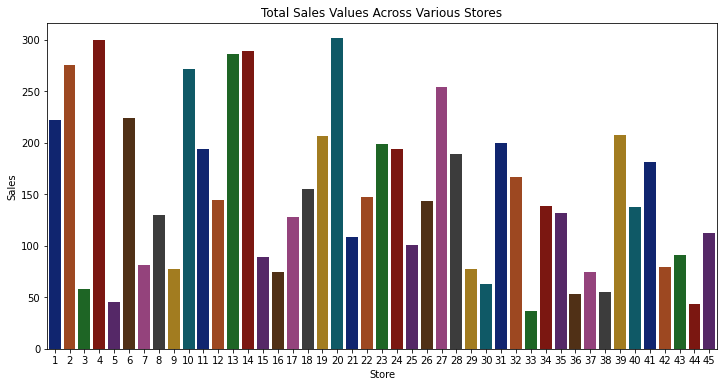

In [30]:
#avg unemployment rate across all stores against time
unemp = data.Unemployment.groupby(data.Date).mean()
plt.figure(figsize=(12,6))
sns.lineplot(x=unemp.index,y=unemp)
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.title('Avg Unemployment Rate Over Time')

#Per Store Analysis
plt.figure(figsize=(12,6))
sns.lineplot(x='Date',y='Unemployment',data=data,hue='Store',palette='dark')
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=9)
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rates Across Various Stores Over Time')

plt.figure(figsize=(12,6))
sns.scatterplot(x='Unemployment',y='Weekly_Sales',data=data,hue='Store',palette='dark')
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=9)
plt.xlabel('Unemployment Rate')
plt.ylabel('Sales')
plt.title('Sales vs Unemployment Rates Across Various Stores')

unemp_s = data.Unemployment.groupby(data.Store).mean()

plt.figure(figsize=(12,6))
sns.barplot(x=unemp_s.index,y=cpi_s,palette='dark')
plt.xlabel('Store')
plt.ylabel('Unemployment Rate')
plt.title('Avg Unemployment Rates Across Various Stores')

plt.figure(figsize=(12,6))
sns.barplot(x=sales_s.index,y=sales_s,palette='dark')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.title('Total Sales Values Across Various Stores')

In [31]:
print("Stores with the Highest Unemployment Rates:")
unemp_s[unemp_s==unemp_s.max()]

Stores with the Highest Unemployment Rates:


Store
12    13.116483
28    13.116483
38    13.116483
Name: Unemployment, dtype: float64

In [32]:
print("Stores with the Least Unemployment Rates:")
unemp_s[unemp_s==unemp_s.min()]

Stores with the Least Unemployment Rates:


Store
23    4.796014
40    4.796014
Name: Unemployment, dtype: float64

In [33]:
print(f"Correlation value between Unemployment Rate and Sales is {round(np.corrcoef(unemp,sales)[0][1],3)}.")

Correlation value between Unemployment Rate and Sales is 0.004.


We see from the above graphs that the unemployment rates in the locations of the various stores have been on a steady but decline over the years. The plots show some kind of a step down behaviour which means that the rates are constant over a period of time before they change.

However, even in this case, we see that the correlation value is pretty bad **(0.004)**. This value being very close to zero tells us that there is practically no linear relation between the two variables and so, we cant exactly explain one of the variable in terms of the other.

I can say this because even the stores with least unemployment rates i.e. Stores 23 and 40 showcase sales results relatively on par with the other stores. Even among the two stores (23 and 40) show different sales numbers even after having the same unemployment rate.

Now, lets compare the various attributes among the two stores with the maximum sales and the one with the minimum sales, **Store 20** and **Store 33**.

Text(0.5, 1.0, 'Unemployment Rate Comparison')

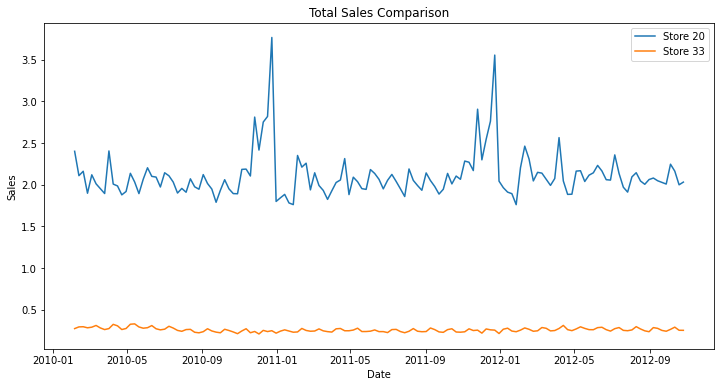

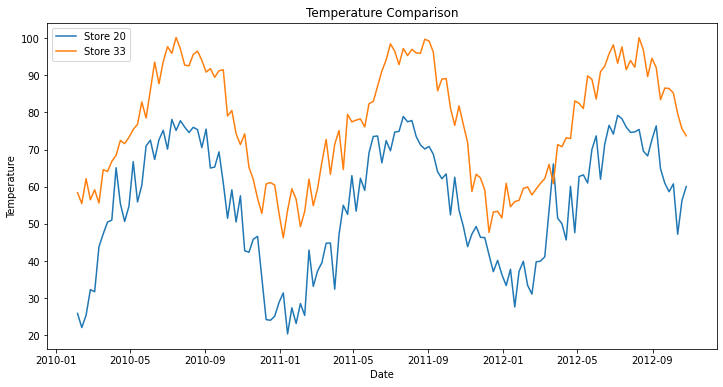

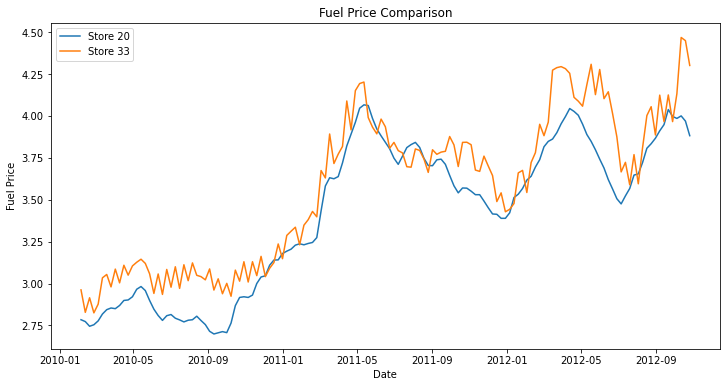

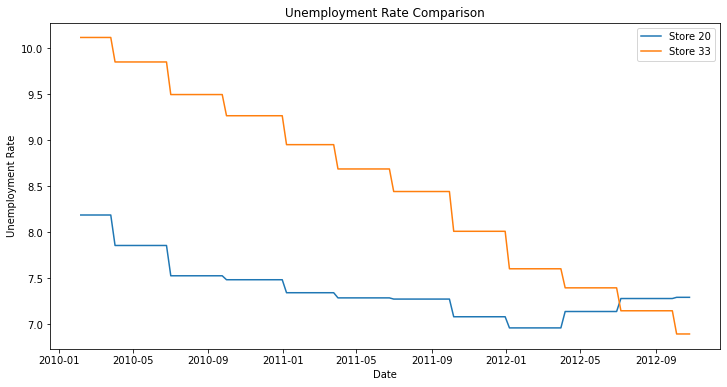

In [34]:
#Total Sales Comparison
plt.figure(figsize=(12,6))
sns.lineplot(x='Date',y='Weekly_Sales',data=data.loc[data.Store==20],label='Store 20')
sns.lineplot(x='Date',y='Weekly_Sales',data=data.loc[data.Store==33],label='Store 33')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Total Sales Comparison')

#Temperature Comparison
plt.figure(figsize=(12,6))
sns.lineplot(x='Date',y='Temperature',data=data.loc[data.Store==20],label='Store 20')
sns.lineplot(x='Date',y='Temperature',data=data.loc[data.Store==33],label='Store 33')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Comparison')

#Fuel Price Comparison
plt.figure(figsize=(12,6))
sns.lineplot(x='Date',y='Fuel_Price',data=data.loc[data.Store==20],label='Store 20')
sns.lineplot(x='Date',y='Fuel_Price',data=data.loc[data.Store==33],label='Store 33')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Fuel Price')
plt.title('Fuel Price Comparison')

#Unemployment Rate Comparison
plt.figure(figsize=(12,6))
sns.lineplot(x='Date',y='Unemployment',data=data.loc[data.Store==20],label='Store 20')
sns.lineplot(x='Date',y='Unemployment',data=data.loc[data.Store==33],label='Store 33')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate Comparison')

In [35]:
print(f"The percent increase between Sales of Store 20 and 33 is {round(data.loc[data.Store==20].Weekly_Sales.mean()*100/data.loc[data.Store==33].Weekly_Sales.mean(),3)}%.")

The percent increase between Sales of Store 20 and 33 is 811.076%.


In [36]:
data.loc[data.Store==20].Weekly_Sales.mean()/data.loc[data.Store==33].Weekly_Sales.mean()

8.110764052605246

We see that there is a considerable difference in the sales the two stores bring up (Sales of Store 20 is almost **811%** of the Store 33). And eventhough we have expressed from above that no two variables have a good correlation score, we can see certain attributes differing between the two stores and although we can't generalize for all the stores, we can come up with some sort of a logical inference from the above graphs.

The temperature pattern is pretty similar in both the stores, the only difference being that store 20 experiences slightly lower temperatures than its counterpart. We in the Temperature Analyis came up with an optimal range wherein we found entries on the dataset which had sales higher than 75% of the maximum sales, and the temperatures of Store 20 actually do belong to this range.

The fuel prices are pretty much overlapping between the two stores and this is in fact true with the correlation score. We cannot really judge or get a sense of the sales with a given fuel score.

The Final Graph shows the varying unemployment rates of the two stores. The rate of Store 20 seems pretty constant over the years even with slight changes when compared with that of Store 33 which keeps falling drastically. This actually does make some sense as when the unemployment rate is high, people do tend to cut down on their expenses as they are left with tighter budgets and they might want to spend less on luxury goods. Store 33 starts of having a very large unemplyment rate which might explain the lower sales. However, this value keeps decreasing but reaches the level of Store 20 right around the end of the dataset dates.

By conducting these analysis and deriving insights from the provided dataset, each store can make data-driven decisions to improve their inventory management, optimize stock levels, anticipate demand fluctuations, and enhance overall operational efficiency.

Now, lets shift our focus to Forecast Planning where we shall attempt to map out or essentially be able to predict future sales based on the inherent patterns. For this we shall be using the ARIMA Libraries.

An **AutoRegressive Integrated Moving Average or ARIMA**, is a statistical analysis model that uses time series data to either better understand the dataset or to predict future trends. This model is AutoRegressive as it predicts future values based on past values. (src: Investopedia)

Continue with importing the necessary libraries libraries.

In [37]:
!pip install pmdarima


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
from pmdarima.arima import auto_arima

Instead of hardcoding the optimal parameters (p,d,q values) of the ARIMA Model, we shall use the auto_arima function from pmdarima which shall select the best parameters based on the patterns shown by the dataset.

Say we want to forecast the sales of Store 20. First split the sales series into training and testing data series for training the ARIMA model.

In [39]:
sales_20 = data.loc[data.Store==20][['Date','Weekly_Sales']]
sales_20.set_index('Date',inplace=True)
train_size = int(len(sales_20)*0.8)
train, test = sales_20[0:train_size], sales_20[train_size:]

In [40]:
model = auto_arima(train, seasonal=False, suppress_warnings=True)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index=test.index,columns=['Prediction'])

In [41]:
print("Summary:")
model.summary()

Summary:


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  114
Model:               SARIMAX(2, 0, 1)   Log Likelihood                 -13.852
Date:                Mon, 31 Jul 2023   AIC                             37.705
Time:                        23:51:24   BIC                             51.386
Sample:                    02-05-2010   HQIC                            43.257
                         - 04-06-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.0380      0.444      4.589      0.000       1.168       2.908
ar.L1         -0.3832      0.240     -1.595      0.111      -0.854       0.088
ar.L2          0.4219      0.088      4.784      0.000       0.249       0.595
ma.L1          0.7536      0.266      2.834      0.005       0.232       1.275
sigma2         0.0745      0.007     11.441      0.000       0.062       0.087
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               248.38
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               4.65   Skew:                             1.51
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0.5, 1.0, 'Testing Data vs Prediction')

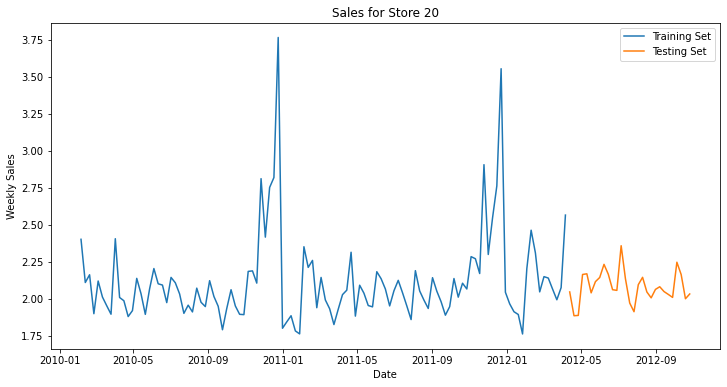

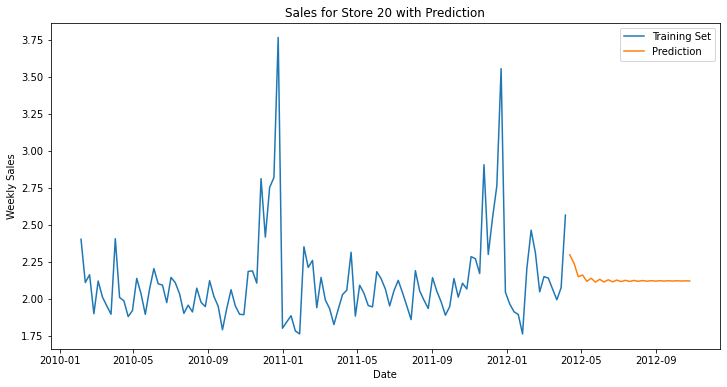

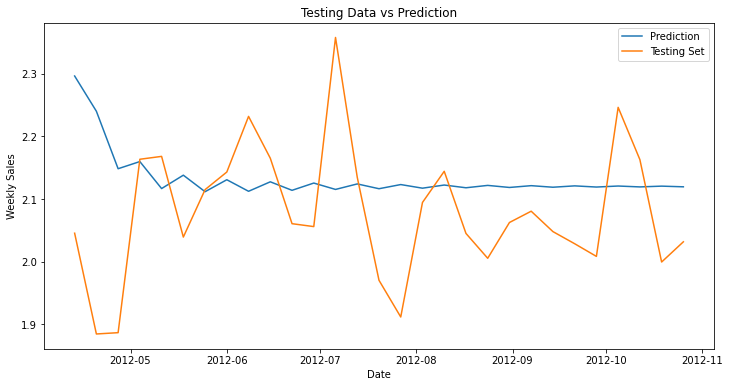

In [42]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Date',y='Weekly_Sales',data=train,label='Training Set')
sns.lineplot(x='Date',y='Weekly_Sales',data=test,label='Testing Set')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Sales for Store 20')

plt.figure(figsize=(12,6))
sns.lineplot(x='Date',y='Weekly_Sales',data=train,label='Training Set')
sns.lineplot(x='Date',y='Prediction',data=forecast,label='Prediction')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Sales for Store 20 with Prediction')

plt.figure(figsize=(12,6))
sns.lineplot(x='Date',y='Prediction',data=forecast,label='Prediction')
sns.lineplot(x='Date',y='Weekly_Sales',data=test,label='Testing Set')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Testing Data vs Prediction')

In [43]:
print(f"Mean of the Predicted Data is {np.mean(forecast.Prediction)}.")
print(f"Mean of the Testing Data is {np.mean(test.Weekly_Sales)}.")

Mean of the Predicted Data is 2.1330566615591864.
Mean of the Testing Data is 2.0789945403448273.


We see that the ARIMA model is roughly the average of the testing set sales data. Hence, we see that we are able to get a reasonable estimate as to the amount of sales the company can bring up in the future.

**Conclusion**

Hence, in this project I was able to do the following:

- **Refine the Data:** Here we checked the dataset for missing, null or nan values. If we were to find any, we could have either removed such an entry or fill it up with some logical entry. We have also checked the dataset for duplicated values. We have also converted the date series from strings to panda time delta for easier analysis.
- **Capture Sales Trends:** Here we looked at how the total sales of the company were doing over time. We also looked into the distribution of holidays over the time period and checked for the relation between holiday specific weeks and sales.
- **Perform Seasonal Analysis:** Painted a seasonal portrait over the sales distribution as per the American Seasons. Looked into factors like Temperature and Fuel Prices and looked into how they would affect sales.
- **Economic Indicators:** Looked into factors like the Consumer Product Index (CPI) and the Unemployment Rates under different stores and checked how they would in turn affect the sales of the company.
- **Store Specific Analysis:** Draw similarities and differences between the two stores producing the maximum sales and the minimum sales. Gave explanations on how the similarities and differences in turn led to the sales being the way they are.
- **Forecasting:** Finally, I was able to build an ARIMA Model to predict future trends or sales given a past history. The results came out to be fairly accurate to the true results.

**References**

- https://en.wikipedia.org/wiki/Walmart
- https://www.investopedia.com/terms/c/consumerpriceindex.asp
- https://www.investopedia.com/terms/u/unemploymentrate.asp
- https://www.investopedia.com/terms/a/autoregressive-integrated-moving-average-arima.asp